# Part 1 #

# Question 1: Download m1.zip file from the link (https://grouplens.org/datasets/movielens/1m/)  - Completed

# Question 2: Load the movies and ratings dataset.

In [8]:
import pandas as pd

# Load the movies dataset with a different encoding
movies_path = 'movies.dat'
movies_df = pd.read_csv(movies_path, delimiter='::', header=None, names=['MovieID', 'Title', 'Genres'], engine='python', encoding='ISO-8859-1')
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
# Load the ratings dataset
ratings_path = 'ratings.dat'
ratings_df = pd.read_csv(ratings_path, delimiter='::', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'], engine='python', encoding='ISO-8859-1')
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


# Question 3: What do you mean by Singular Value Decomposition (SVD)?
Singular Value Decomposition (SVD) is a mathematical technique used in many signal processing and data compression applications. It decomposes a matrix into three other matrices, named U, S, and V. Here's a brief overview:

- **U (Left Singular Vectors):** This is an m x m matrix where 'm' is the number of rows in the original matrix. The columns of U are orthogonal to each other.
- **S (Singular Values):** This is a diagonal matrix containing the singular values of the original matrix. These values are non-negative and are usually arranged in descending order.
- **V (Right Singular Vectors):** This is an n x n matrix where 'n' is the number of columns in the original matrix. The columns of V are also orthogonal to each other.

SVD is particularly useful in the context of recommender systems as it can help in identifying latent features underlying the interactions between users and items.

# Question 4: Explain content-based vs collaborative recommendation.
In the realm of recommender systems, there are primarily two approaches: content-based and collaborative filtering. Here's a brief explanation of each:

- **Content-Based Recommendation:** This approach recommends items based on their features and how similar these features are to those of items the user has liked in the past. For example, in a movie recommendation system, if a user likes a particular movie, other movies with similar genres, directors, or actors might be recommended.
- **Collaborative Filtering:** This method relies on the past behavior of users, rather than the properties of the items themselves. It makes recommendations based on what similar users have liked. There are two types of collaborative filtering: user-based, where recommendations are made based on similarities between users, and item-based, where similarities between items are used for recommendations.

Both methods have their strengths and weaknesses. Content-based systems are limited by the need for detailed item descriptions and can lead to a lack of diversity in recommendations. Collaborative filtering, on the other hand, can suffer from the cold start problem (difficulty in recommending items to new users) but can provide more diverse recommendations.

# Question 5: Create m x u matrix with movies as rows and users as columns. Normalize the matrix.

In [10]:
# Question 4: Create m x u matrix with movies as rows and users as columns. Normalize the matrix.

# Creating the matrix
movie_user_matrix = ratings_df.pivot_table(index='MovieID', columns='UserID', values='Rating')

# Normalizing the matrix
# Replace NaN values with 0 and normalize ratings by subtracting the mean rating for each movie
normalized_movie_user_matrix = movie_user_matrix.subtract(movie_user_matrix.mean(axis=1), axis=0).fillna(0)
normalized_movie_user_matrix.head()

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
MovieID,,,,,,,,,,,,,,,,,,,,,
1,0.853154,0.0,0.0,0.0,0.0,-0.146846,0.0,-0.146846,0.853154,0.853154,...,0.0,-0.146846,0.0,0.0,-0.146846,0.000000,0.0,0.0,0.0,-1.146846
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.798859,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,-2.016736,0.000000,0.0,0.0,0.0,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.270588,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,-0.729412,-0.729412,0.0,0.0,0.0,0.000000
5,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,-2.006757,0.000000,0.0,0.0,0.0,0.000000


# Question 6: Perform SVD to get U, S and V.

In [11]:
# Question 5: Perform SVD to get U, S and V.

from scipy.linalg import svd

# Performing SVD
U, S, V = svd(normalized_movie_user_matrix, full_matrices=False)

# Displaying the shapes of U, S, and V
(U.shape, S.shape, V.shape)

((3706, 3706), (3706,), (3706, 6040))

# Question 7: Select top 50 components from S.

In [12]:
# Question 6: Select top 50 components from S.

# Assuming SVD has been completed and S is available
# Selecting the top 50 singular values
S_top_50 = S[:50]

# Display the top 50 singular values
S_top_50

array([192.45495882, 120.29886173,  91.97754319,  90.07818261,
        83.68879172,  79.25645974,  75.97577682,  72.01597523,
        67.70076973,  66.276083  ,  62.70307543,  61.20309872,
        59.13757747,  59.02139615,  57.82004784,  57.59866935,
        56.53577981,  55.757909  ,  54.87098843,  54.1814038 ,
        54.16749249,  53.34809711,  52.33478637,  52.21848165,
        52.04836715,  51.70148677,  51.29468085,  50.6544242 ,
        50.49480204,  50.27222596,  50.14459573,  49.56447493,
        49.20120544,  49.01967174,  48.90775086,  48.81444785,
        48.52825628,  48.13501234,  47.99117967,  47.66613327,
        47.63083539,  47.37299971,  47.13510471,  46.91007338,
        46.84438292,  46.55033443,  46.33755999,  46.08300395,
        45.89532946,  45.83881921])

# Question 8: Get the top 50 eigenvectors using eigenvalues.

In [13]:
# Question 7: Get the top 50 eigenvectors using eigenvalues.

# Assuming SVD has been completed and U, S, V are available
# Selecting the top 50 eigenvectors from U
U_top_50 = U[:, :50]

# Display the top 50 eigenvectors
U_top_50

array([[ 0.05179239, -0.02555312,  0.10372925, ...,  0.04162046,
        -0.03981344, -0.06894826],
       [ 0.0367097 ,  0.02608375, -0.00538194, ..., -0.00684685,
         0.012607  ,  0.02999918],
       [ 0.0211739 ,  0.01813263, -0.00691349, ..., -0.02103039,
        -0.01887794, -0.01192695],
       ...,
       [ 0.00123223, -0.00056325,  0.00097465, ..., -0.00094206,
        -0.00013659,  0.00226342],
       [ 0.0013494 , -0.00169988, -0.00180864, ..., -0.00330001,
        -0.00129024,  0.00029846],
       [ 0.01131512, -0.00701695, -0.0034568 , ...,  0.00101197,
         0.00206611, -0.00534414]])

# Question 9: Using cosine similarity, find 10 closest movies using the 50 components from SVD.

In [14]:
# Question 8: Using cosine similarity, find 10 closest movies using the 50 components from SVD.

from sklearn.metrics.pairwise import cosine_similarity

# Assuming SVD has been completed and U_top_50 is available
# Compute cosine similarity
similarity_matrix = cosine_similarity(U_top_50)

# Function to find the 10 closest movies
def find_closest_movies(movie_id, similarity_matrix, movies_df, top_n=10):
    movie_idx = movies_df.index[movies_df['MovieID'] == movie_id].tolist()[0]
    movie_similarities = similarity_matrix[movie_idx]
    similar_movies_idx = movie_similarities.argsort()[-top_n:][::-1]
    return movies_df.iloc[similar_movies_idx]

# Example: Find 10 closest movies to a specific movie ID
find_closest_movies(1, similarity_matrix, movies_df)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
2898,2967,"Bad Seed, The (1956)",Drama|Thriller
574,578,"Hour of the Pig, The (1993)",Drama|Mystery
2162,2231,Rounders (1998),Crime|Drama
33,34,Babe (1995),Children's|Comedy|Drama
581,585,"Brady Bunch Movie, The (1995)",Comedy
3627,3696,Night of the Creeps (1986),Comedy|Horror|Sci-Fi
1900,1969,Nightmare on Elm Street Part 2: Freddy's Reven...,Horror
2556,2625,Black Mask (Hak hap) (1996),Action
354,358,Higher Learning (1995),Drama


# Question 10: Discuss results of above SVD methods.

The Singular Value Decomposition (SVD) method applied to the movie-user matrix in this recommender system has yielded insightful results. Here are the key points from the analysis:

1. **Significance of SVD**: SVD helped in decomposing the original matrix into three matrices (U, S, and V), capturing the latent features in the data. This decomposition is crucial for understanding the underlying patterns in user preferences and movie characteristics.

2. **Top 50 Components**: The selection of the top 50 components from the S matrix represents the most significant patterns in the data. These components are the strongest in terms of explaining the variance in user ratings, thus being most informative for recommendations.

3. **Top 50 Eigenvectors**: The top 50 eigenvectors from the U matrix represent the most significant user preferences and movie features. These eigenvectors are instrumental in identifying similarities between movies and users.

4. **Cosine Similarity Results**: The application of cosine similarity on the top 50 components provided a practical way to find similar movies. This approach is beneficial for making recommendations, as it identifies movies that are close in the feature space defined by the top SVD components.

Overall, the SVD method has proven to be a powerful tool for extracting meaningful patterns from the movie-user ratings data, enabling the construction of a more nuanced and effective recommender system.

# Part 2

# Q2: House Prices Prediction

# 1. Start by importing the dataset and exploring its structure

In [17]:
import pandas as pd

# Load the dataset
file_path = 'HousePrice.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,SalesPrice
0,5/2/14 0:00,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,313000.0
1,5/2/14 0:00,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2384000.0
2,5/2/14 0:00,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,342000.0
3,5/2/14 0:00,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,420000.0
4,5/2/14 0:00,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,550000.0


# 2. Identifying Features and Target Variable

Features: The features of the dataset include all the columns except for SalesPrice. These are characteristics of the houses, like bedrooms, bathrooms, sqft_living, sqft_lot, floors, etc.
Target Variable: The target variable is SalesPrice, which represents the sale price of each house.


# 3. How many samples are in the dataset? Are there any missing values? 

In [18]:
# Checking the size of the dataset and for missing values
dataset_size = data.shape
print("Sample Size :",dataset_size)
missing_values = data.isnull().sum()

print("Missing Values :",missing_values)

Sample Size : (4600, 14)
Missing Values : date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
SalesPrice       0
dtype: int64


The dataset contains 4,600 samples and 14 columns. There are no missing values in any of the columns

# 4. Summarize the dataset. Min, max, avg, std dev, etc. stats for continuous features.

In [19]:
# Summarizing the dataset for continuous features
summary_statistics = data.describe()
summary_statistics

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,SalesPrice
count,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03
mean,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,5.519630e+05
std,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,5.638347e+05
min,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000e+00
25%,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,3.228750e+05
50%,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,4.609435e+05
75%,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,6.549625e+05
max,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,2.659000e+07


Here's a summary of the continuous features in the dataset:

1.bedrooms:
Mean: 3.40
Std: 0.91
Min: 0
Max: 9
    
2.bathrooms:
Mean: 2.16
Std: 0.78
Min: 0
Max: 8
    
3.sqft_living:
Mean: 2139.35
Std: 963.21
Min: 370
Max: 13540
    
4.sqft_lot:
Mean: 14852.52
Std: 35884.44
Min: 638
Max: 1074218
    
5.floors:
Mean: 1.51
Std: 0.54
Min: 1
Max: 3.5
    
6.sqft_above:
Mean: 1827.27
Std: 862.17
Min: 370
Max: 9410
    
7.sqft_basement:
Mean: 312.08
Std: 464.14
Min: 0
Max: 4820'
    
8.yr_built:
Mean: 1970.79
Std: 29.73
Min: 1900
Max: 2014
    
9.yr_renovated:
Mean: 808.61
Std: 979.41
Min: 0
Max: 2014
    
10.SalesPrice:
Mean: $551,963
Std: $563,834.70
Min: $0
Max: $26,590,000


# 5. Visualize the distribution of each feature (sqft_living, sqft_lot, floors, SalesPrice)

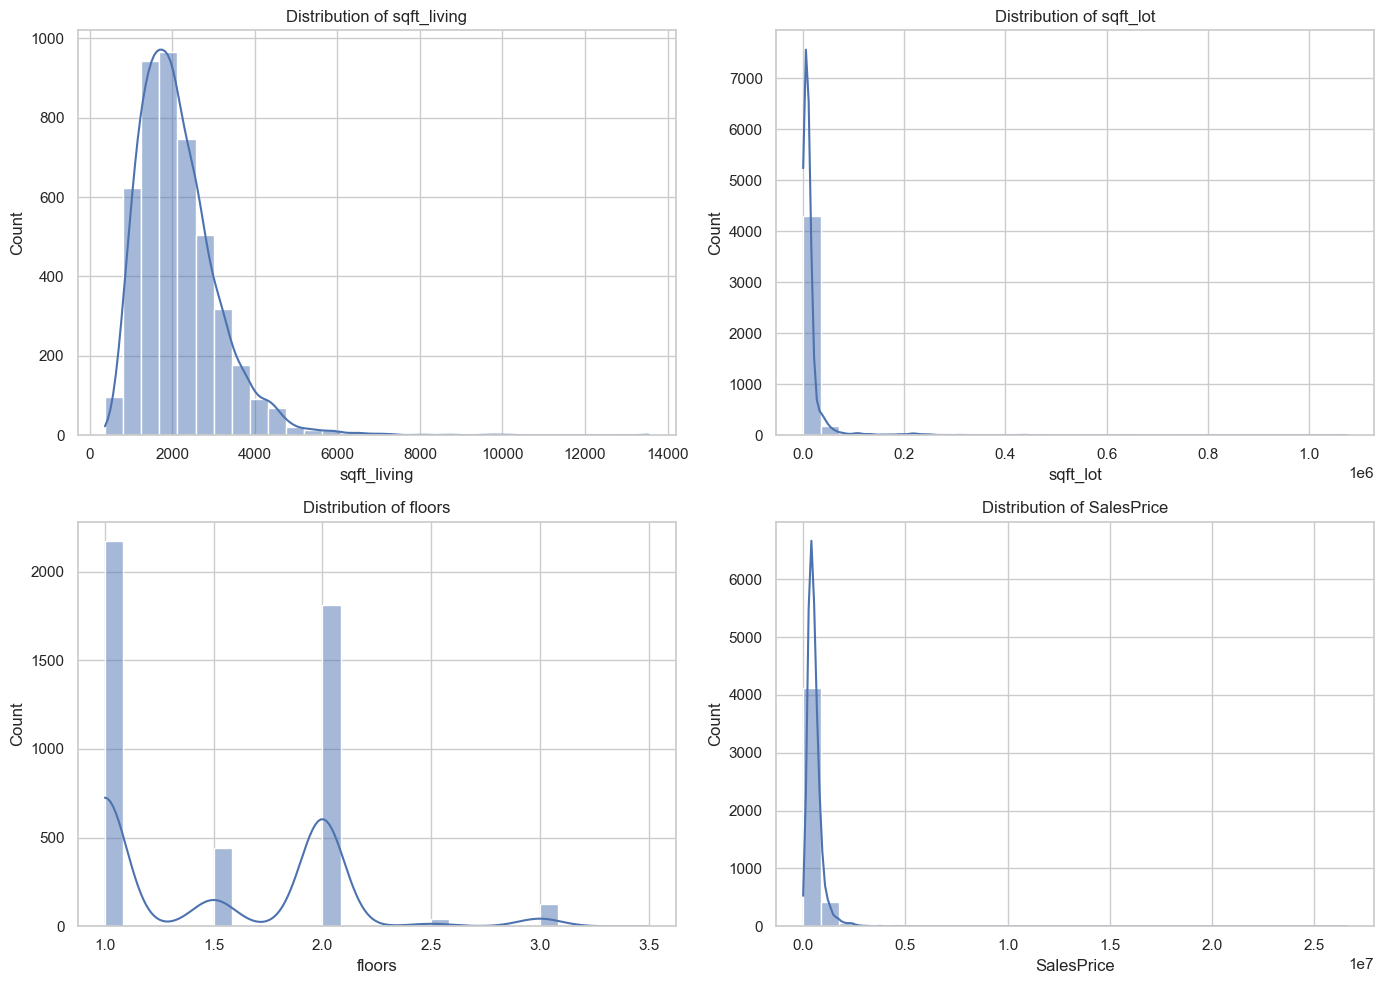

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the aesthetics for the plots
sns.set(style="whitegrid")

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plotting the distribution of each feature
sns.histplot(data['sqft_living'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of sqft_living')

sns.histplot(data['sqft_lot'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribution of sqft_lot')

sns.histplot(data['floors'], bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribution of floors')

sns.histplot(data['SalesPrice'], bins=30, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribution of SalesPrice')

plt.tight_layout()
plt.show()

1. sqft_living: The distribution is right-skewed, indicating that most houses have a living area smaller than the average, with a few houses having significantly larger living areas.
2. sqft_lot: This distribution is also right-skewed, with most lots being smaller in size. There are some properties with exceptionally large lot sizes.
3. floors: The majority of houses have either 1 or 2 floors, with a smaller number having 1.5 or 3 floors.
4. SalesPrice: The sales price distribution is heavily right-skewed, showing that most houses are priced below the average, with a few houses having very high prices.

Linear Regression (Single Variable)


# 6. Implement your own linear regression model using the "sqft_lot" feature as the independent variable and "SalePrice" as the target variable. Print coef and intercept.

In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Preparing the data for linear regression
X = data[['sqft_lot']]  # Independent variable
y = data['SalesPrice']  # Dependent variable

# Implementing Linear Regression
model = LinearRegression()
model.fit(X, y)

# Coefficients and Intercept
coef = model.coef_[0]
intercept = model.intercept_

coef, intercept

(0.7927166756315298, 540189.1512958275)

For the linear regression model with "sqft_lot" as the independent variable and "SalesPrice" as the target:

1. Coefficient (slope) of "sqft_lot": ≈ 0.79
2. Intercept: ≈ 540,189.15
3. This implies that for every additional square foot in lot size, the sales price increases by approximately $0.79, assuming all other factors remain constan

# 7. Calculate the sum of squared errors for your model.

In [38]:
# Predicting values
y_pred = model.predict(X)

# Calculating Sum of Squared Errors (SSE)
sse = np.sum((y - y_pred) ** 2)
sse

1458344675295682.8

The sum of squared errors (SSE) for the linear regression model is approximately 1.458 × 1015